

<h1 style="font-size:30px;color:black;text-align:center; text-decoration:underline">                   An analysis of the most popular repos on Github[completed]</h1>
<img src="https://kanbanize.com/blog/wp-content/uploads/2014/11/GitHub.jpg" alt="github" width=50% height=50%>
<hr>
_Areas of focus include: Type of repo,Metrics of popularity, Languages used_

_Data Source: https://www.kaggle.com/chasewillden/topstarredopensourceprojects _

#### Objective of this analysis:
<br>
<ol>
<li>Learning how to read and analyse a dataset</li>
<li>Understanding the dominant languages used for popular GitHub projects and mapping them</li>
<li>Extracting the different domains of work done in these projects via the repositories tags</li>
<li>Deriving conclusions over the popularity of respective domains and languages</li>
</ol>
<hr>
**All text in blue represents a derived conclusion**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from ggplot import *
plt.style.use('default')


C:\work\github_analysis\analize_example\venv\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
git_df = pd.read_csv("../input/TopStaredRepositories.csv", parse_dates=['Last Update Date'], dayfirst=True)
git_df.head()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7k,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7k,visualization,https://github.com/d3/d3


In [3]:
git_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
Username            980 non-null object
Repository Name     980 non-null object
Description         977 non-null object
Last Update Date    980 non-null datetime64[ns]
Language            877 non-null object
Number of Stars     980 non-null object
Tags                489 non-null object
Url                 980 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 61.3+ KB


<h2 style="text-decoration:underline">1. Popular Repositories</h2>
<br>
**Determining what constitutes a popular repository by extracting the range of maximum and minimum starred repositories**

<em>Converting the alphanumeric format of "Number of Stars" to numeric

In [4]:
git_df_max = git_df['Number of Stars'].str.contains('k').all()
git_df_max

True

In [5]:
git_df['Number of Stars']=git_df['Number of Stars'].str.replace('k','').astype(float)

### 1.1 The top 5 repositories in the dataset [based on "Number of Stars"]

In [6]:
git_df.head()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7,visualization,https://github.com/d3/d3


### 1.2 The bottom 5 repositories in the dataset

In [7]:
git_df.tail()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
975,chrisjenx,Calligraphy,Custom fonts in Android the easy way...,2017-06-06 19:23:22,Java,6.4,NaN,https://github.com/chrisjenx/Calligraphy
976,eliangcs,http-prompt,HTTPie + prompt_toolkit = an interactive comma...,2017-05-11 13:27:42,Python,6.4,"python,syntax-highlighting,shell,cli,http,auto...",https://github.com/eliangcs/http-prompt
977,robertdavidgraham,masscan,"TCP port scanner, spews SYN packets asynchrono...",2017-06-22 06:27:09,C,6.4,NaN,https://github.com/robertdavidgraham/masscan
978,ElemeFE,mint-ui,Mobile UI elements for Vue.js,2017-06-22 10:02:35,Vue,6.4,"vue,mobile,component,vue-components,ui-kit",https://github.com/ElemeFE/mint-ui
979,lhc70000,iina,The modern video player for macOS.,2017-06-24 19:09:31,Swift,6.4,"macos,video,mpv,swift,video-player",https://github.com/lhc70000/iina


### 1.3 Statistical analysis of the repositories

In [8]:
git_df['Number of Stars'].describe()

count    980.000000
mean      12.985714
std       12.780092
min        6.400000
25%        7.700000
50%        9.500000
75%       14.200000
max      290.000000
Name: Number of Stars, dtype: float64

<h4 style="color:blue">Most popular repo- 290,000 stars</h4>
<h4 style="color:blue"> Least popular repo- 6400 stars</h4>
<h4 style="color:blue">Average rating of repos- 13,000 stars</h4>

### 1.3 List of all repositories with stars > 13,000

In [9]:
popular_repos= git_df[git_df['Number of Stars'] > 13.0]
len(popular_repos)

288

In [10]:
popular_repos.head(8)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7,visualization,https://github.com/d3/d3
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23 10:42:36,JavaScript,62.0,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24 18:25:42,C++,61.6,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24 17:26:02,NaN,60.7,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome


In [11]:
popular_repos.tail(8)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
280,jondot,awesome-react-native,"Awesome React Native components, news, tools, ...",2017-06-23 05:34:47,Ruby,13.3,"react,mobile,react-native,awesome-list",https://github.com/jondot/awesome-react-native
281,apache,spark,Mirror of Apache Spark,2017-06-24 17:07:10,Scala,13.3,NaN,https://github.com/apache/spark
282,Thibaut,devdocs,API Documentation Browser,2017-06-18 23:41:29,Ruby,13.3,"devdocs,offline,app,documentation,docs,pwa,api...",https://github.com/Thibaut/devdocs
283,chjj,marked,A markdown parser and compiler. Built for speed.,2017-06-12 01:27:25,HTML,13.2,NaN,https://github.com/chjj/marked
284,knsv,mermaid,Generation of diagram and flowchart from text ...,2017-06-04 07:26:58,JavaScript,13.2,NaN,https://github.com/knsv/mermaid
285,juliangarnier,anime,JavaScript Animation Engine,2017-06-24 15:44:51,JavaScript,13.1,"anime,animation",https://github.com/juliangarnier/anime
286,designmodo,Flat-UI,Flat UI Free - Design Framework (html/css3/les...,2017-02-21 20:29:33,CSS,13.1,NaN,https://github.com/designmodo/Flat-UI
287,julianshapiro,velocity,Accelerated JavaScript animation.,2017-05-12 13:58:42,JavaScript,13.1,NaN,https://github.com/julianshapiro/velocity



<h3 style="color:blue"> Here we see that freeCodeCamp tops the list with 290,000 stars to its repository.</h3>
<hr>
### The above list lists all repos that have > 13,000 stars [above average repositories]
#### A few more observations can be derived from this list:
<ol>
<li style="color:blue">5 of the most popular repos are frameworks</li>
<li style="color:blue">The third, sixth and eighth most popular repos are educational, and instructive in nature.</li>
</ol>

In [12]:
# classifying repositories according to the popularity
classified_repos=[]
for i in range(8,300,7):
    x = git_df[(git_df['Number of Stars'] >= i) & (git_df['Number of Stars'] <(i+7.0))]
    classified_repos.append(len(x))

In [13]:
indexes = []

for i in range (8000,300000, 7000):
    x = '[' + str(i) +','+ (str(i+7000)) + ')'
    indexes.append(x)


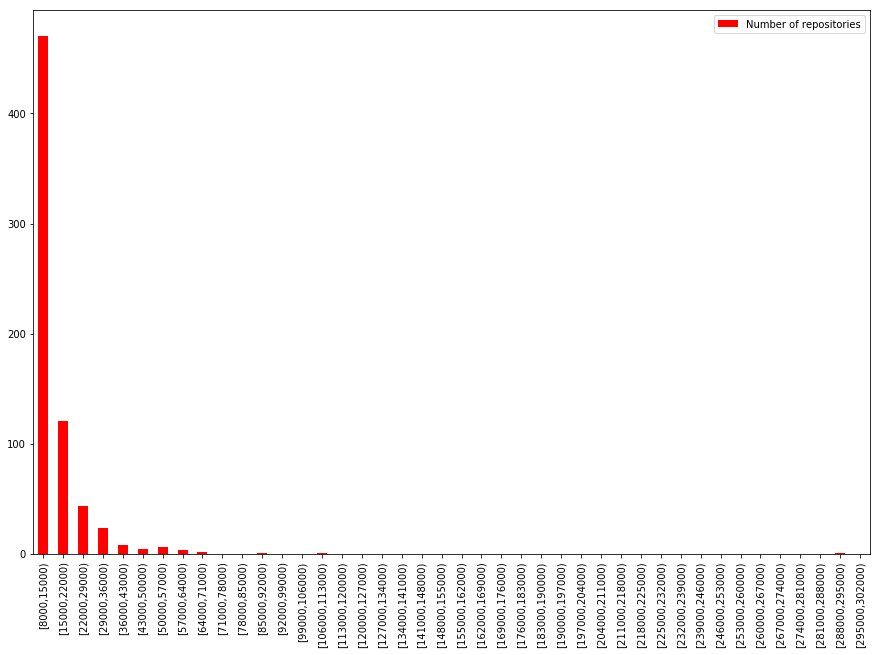

In [14]:
divided_repos = pd.Series(data=classified_repos, index=indexes)
divided_repos.plot(kind='bar', figsize=(15,10), color=['red'],legend=True, label='Number of repositories')

<h2 style="text-decoration:underline">2. Popular Languages</h2>
<br>
**Determining the popularity of a language based on the number of repositories using it.**

In [15]:
x=git_df['Language'].value_counts()
x.head()
#p = ggplot(aes(x='index',y='count'), data =x) + geom_point(color='coral') + geom_line(color='red')
#print(p)

JavaScript     338
Java            67
Python          63
Ruby            44
Objective-C     43
Name: Language, dtype: int64

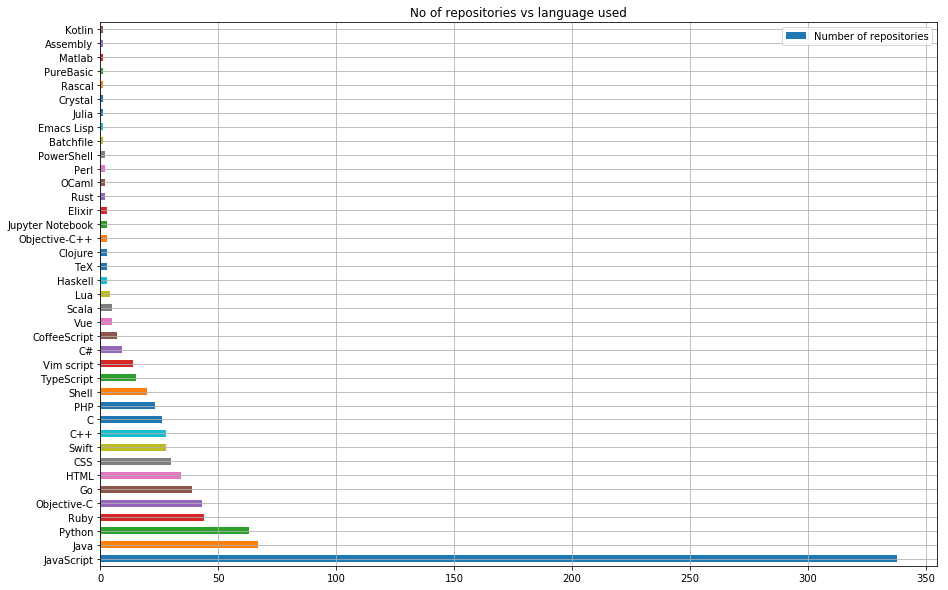

In [16]:
%matplotlib inline
plt.figure()
x.plot(kind='barh',figsize=(15,10),grid=True, label='Number of repositories',legend='No of repos',title='No of repositories vs language used')


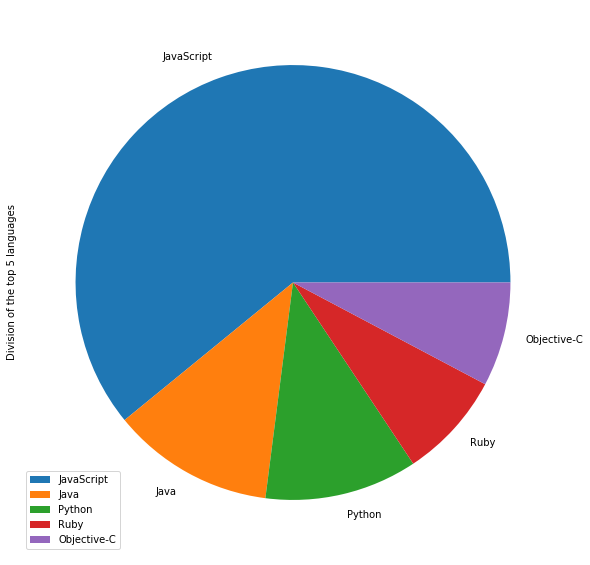

In [17]:
%matplotlib inline
x[:5].plot.pie(label="Division of the top 5 languages",fontsize=10,figsize=(10,10),legend=True)

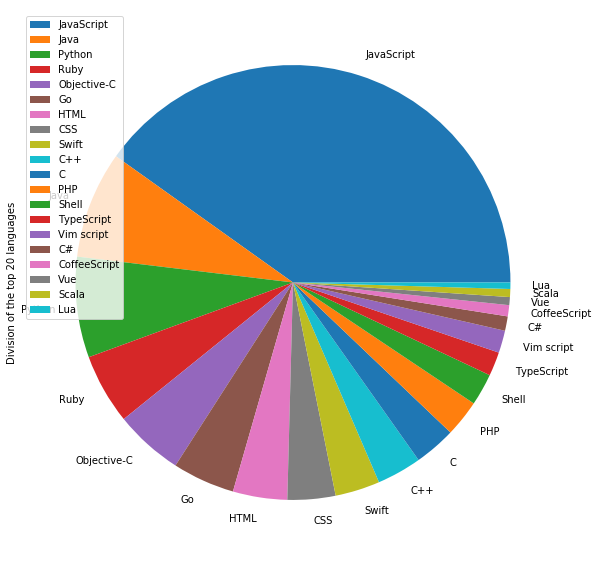

In [18]:
%matplotlib inline
x[:20].plot.pie(label="Division of the top 20 languages",fontsize=10,figsize=(10,10),legend=True)

<h2 style="text-decoration:underline">3. Popular Domains</h2>
<br>
**Determining the popular domains by analysing the repository tags**

<em>Removing all the null-tags fields from the dataframe

In [19]:
#git_df['Number of Stars']=git_df['Number of Stars'].str.replace('k','').astype(float)
nonull_df = git_df[['Tags','Number of Stars']].dropna()
tags_list = nonull_df['Tags'].str.split(',')

In [20]:
tags_list.head()

0    [nonprofits, certification, curriculum, react,...
1    [javascript, css, html, bootstrap, jekyll-site...
2                   [education, list, books, resource]
4                                      [visualization]
5    [book-series, javascript, training-materials, ...
Name: Tags, dtype: object

In [21]:
initial = nonull_df['Tags'].str.split(',')
a = []
for item in initial:
       a = a+item
wc_text = ' '.join(a)

%matplotlib inline
wordcloud = WordCloud(background_color='black',width=800, height=400).generate(wc_text)
plt.figure(figsize=(25,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

In [22]:
web_dev_count = 0
tags = ['javascript', 'css', 'html', 'nodejs', 'bootstrap','react', 'react-native', 'rest-api', 'rest', 'web-development','typescript','coffeescript']
for item in tags_list:
    if set(tags).intersection(item):
        web_dev_count+=1
web_dev_count

171

In [23]:
machine_data_count=0
mach=[]
tags=['machine-learning', 'jupyter','jupter-notebook', 'tensorflow','data-science','data-analytics']
for item in tags_list:
    if set(tags).intersection(item):
        machine_data_count+=1
        mach.append(item)
machine_data_count

16

In [24]:
mobile_dev_count=0
tags=['android','sdk','ios','swift','mobile','react','macos','windows']
for item in tags_list:
    if set(tags).intersection(item):
        mobile_dev_count+=1
mobile_dev_count

99

In [25]:
linux_dev_count=0
linux=[]
tags=['linux','unix','bash','shell','cli','bsd']
for item in tags_list:
    if set(tags).intersection(item):
        linux_dev_count+=1
        linux.append(item)
linux_dev_count

27

In [26]:
hardware_dev_count=0
hardware=[]
tags=['hardware','iot','smart','system','system-architecture','cloud']
for item in tags_list:
    if set(tags).intersection(item):
        hardware.append(item)
        hardware_dev_count+=1
hardware_dev_count

8

In [27]:
domain_series=pd.Series(index=['Web Development','Data Science and Machine Learning','Mobile Development','Linux and Shell Programming','System hardware and IOT'],
                        data=[web_dev_count,machine_data_count,mobile_dev_count,linux_dev_count,hardware_dev_count])

In [28]:
domain_series

Web Development                      171
Data Science and Machine Learning     16
Mobile Development                    99
Linux and Shell Programming           27
System hardware and IOT                8
dtype: int64

[Text(0, 0.5, 'Domain Name'), Text(0.5, 0, 'Number of repositories')]

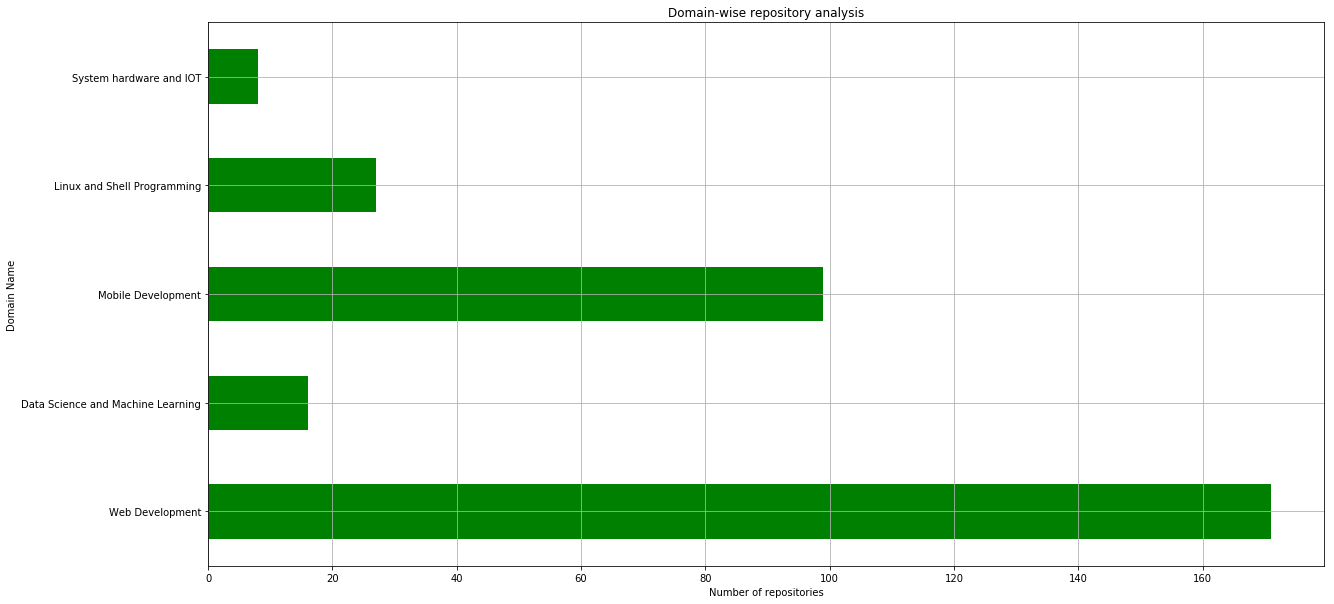

In [29]:
%matplotlib inline
fig_domain=domain_series.plot(lw=2,kind='barh',figsize=(20,10),color=['green'],grid=True,title='Domain-wise repository analysis',
                              )
fig_domain.set(xlabel="Number of repositories", ylabel="Domain Name")

<h2 style="text-decoration:underline">3. Determing the correlation between Number of Tags and Number of Stars</h2>

In [30]:
nonull_df['CountTag']=0
for i in range(0,489,1):
    nonull_df['CountTag'].iloc[i] = len(list(nonull_df['Tags'].iloc[i].split(',')))


C:\work\github_analysis\analize_example\venv\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
nonull_df['CountTag'].corr(nonull_df['Number of Stars'])

0.04646867234912223

<hr>
<h2 style="text-decoration:underline">4. Conclusion</h2>
<br>
**Inferences from the analysis**
<hr>
<ol>
<li>The most popular repository on GitHub is freeCodeCamp, with 290,000 stars</li>
<li>In the top 8 repositories in the dataset, 3 are instructional and educational</li>
<li>JavaScript is the most popularly used language, and constitutes <b>38.5 %</b> of the total languages in these repositories</li> 
<li>Frameworks are the most popular type of projects across GitHub</li>
<li>In domains, Web Development is the most popular domain of work, followed by Mobile (android, iOS, macOS, Windows) development</li>
<li>There is no determinable correlation between the number of tags and the number of stars. The correlation coefficient is a weak 0.04646</li>

### [Extra] Popular python based projects 

In [32]:
python_tags = git_df[git_df['Language'] == 'Python'][['Username', 'Repository Name', 'Description', 'Tags']]

In [34]:
python_tags

,Username,Repository Name,Description,Tags
29,vinta,awesome-python,"A curated list of awesome Python frameworks, l...","python,awesome,collections"
42,jakubroztocil,httpie,Modern command line HTTP client user-friendly...,"python,debugging,cli,http,client,json,developm..."
52,nvbn,thefuck,Magnificent app which corrects your previous c...,"python,shell"
54,pallets,flask,"A microframework based on Werkzeug, Jinja2 and...","python,flask,web-framework,wsgi,jinja,werkzeug"
60,rg3,youtube-dl,Command-line program to download videos from Y...,NaN
65,django,django,The Web framework for perfectionists with dead...,"python,django,views,framework,orm,web,apps,tem..."
67,requests,requests,Python HTTP Requests for Humans,"python,http,requests,forhumans,kennethreitz"
77,ansible,ansible,Ansible is a radically simple IT automation pl...,"python,ansible"
79,josephmisiti,awesome-machine-learning,A curated list of awesome Machine Learning fra...,NaN
104,minimaxir,big-list-of-naughty-strings,The Big List of Naughty Strings is a list of s...,NaN
